# GRIB Data Example 

GRIB format is commonly used to disseminate atmospheric model data. With xarray and the cfgrib engine, GRIB data can easily be analyzed and visualized.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

To read GRIB data, you can use `xarray.load_dataset`. The only extra code you need is to specify the engine as `cfgrib`.

In [2]:
ds = xr.tutorial.load_dataset("era5-2mt-2019-03-uk.grib", engine="cfgrib")

Let's create a simple plot of 2-m air temperature in degrees Celsius:

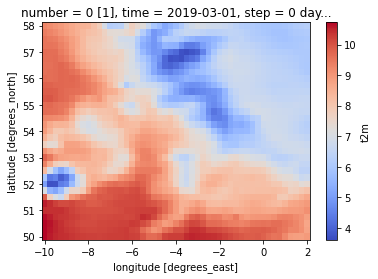

In [3]:
ds = ds - 273.15
ds.t2m[0].plot(cmap=plt.cm.coolwarm)

With CartoPy, we can create a more detailed plot, using built-in shapefiles to help provide geographic context:

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Text(0.5, 1.0, 'ERA5 - 2m temperature British Isles March 2019')

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


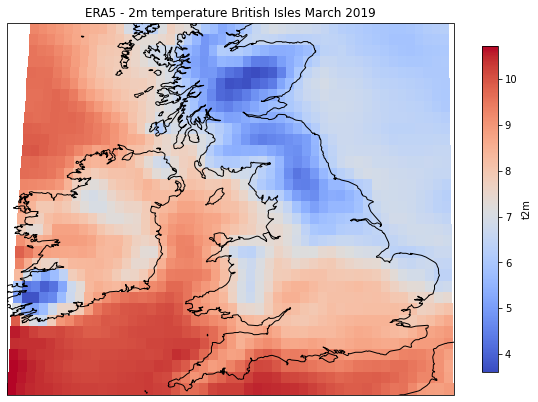

In [4]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = ds.t2m[0].plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)
plt.title("ERA5 - 2m temperature British Isles March 2019")

Finally, we can also pull out a time series for a given location easily:

Text(0.5, 1.0, 'ERA5 - London 2m temperature March 2019')

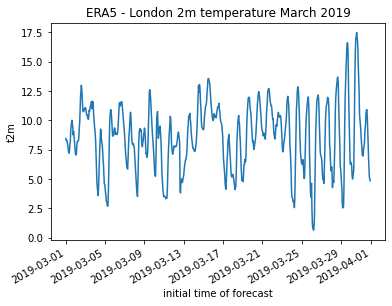

In [5]:
ds.t2m.sel(longitude=0, latitude=51.5).plot()
plt.title("ERA5 - London 2m temperature March 2019")